<a href="https://colab.research.google.com/github/bwowby/DS/blob/master/ir-basic/evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

In [3]:
#random dataset

np.random.seed(123)

y_true = np.random.randint(low=0, high=2, size=20)
y_pred = np.random.randint(low=0, high=2, size=20)

print(y_true.shape, y_pred.shape)
print(y_pred.shape, y_pred.shape)

print(y_true)
print(y_pred)


(20,) (20,)
(20,) (20,)
[0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0]
[0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1]


In [4]:
from sklearn.metrics import confusion_matrix

pr_array = confusion_matrix(y_true,y_pred)

## Classification Evaluation

### Confusion Matrix

In [5]:

tn = pr_array[0][0]
fp = pr_array[0][1]
fn = pr_array[1][0]
tp = pr_array[1][1]

print('tp: %d, fp: %d, fn: %d, tn: %d'%(tp, fp, fn, tn))

tp: 2, fp: 7, fn: 7, tn: 4


### Accuracy (정확도)

In [6]:
n_correct = sum(y_pred == y_true)
accuracy1 = n_correct / len(y_pred)

accuracy1

0.3

In [7]:
accracy2 = (y_pred == y_true).mean(axis=0)
accracy2

0.3

In [8]:
from sklearn.metrics import accuracy_score

accuracy3 = accuracy_score(y_true, y_pred)
accuracy3

0.3

### Precision(정밀도)

In [9]:
precision1 = tp / (fp+tp)
precision1

0.2222222222222222

In [10]:
from sklearn.metrics import precision_score

precision2 = precision_score(y_true,y_pred)
precision2

0.2222222222222222

### Recall(재현율,민감도,TPR)

In [11]:
recall1 = tp / (fn+tp)
recall1

0.2222222222222222

In [12]:
from sklearn.metrics import recall_score

recall2 = recall_score(y_true, y_pred)
recall2

0.2222222222222222

### F1 Score
precision recall의 가중조화 평균 중 베타값이 1일때의 지표.   
어느 한쪽으로 치우치지 않을 때 상태적으로 높은 값을 지님.

In [13]:
f1_1 = (2 *precision1 * recall1) / (precision1 + recall1)
f1_1

0.2222222222222222

In [14]:
from sklearn.metrics import f1_score

f1_2 = f1_score(y_true, y_pred)
f1_2

0.2222222222222222

In [15]:
#classification repoort
from sklearn.metrics import classification_report

print(classification_report(y_true,y_pred, target_names=['claas0','class1']))

              precision    recall  f1-score   support

      claas0       0.36      0.36      0.36        11
      class1       0.22      0.22      0.22         9

    accuracy                           0.30        20
   macro avg       0.29      0.29      0.29        20
weighted avg       0.30      0.30      0.30        20



### ROC 곡선과 AUC

* True Positive Rate (TPR) == Recall   
* True Negative Rate (TNR) == specificity   
* False Positive Rate (FPR) == 1 - TNR 
TPR 과 TNR 반비례   
TPR FPR 은 비레


* ROC 곡선: FPR이 변할떄 TPR이 어떻게 변하는지를 나타내는 곡선. ROC 곡선 아래의 면적인 AUC 가 1에 가까울수록 좋은 수치



In [16]:
from sklearn.metrics import roc_auc_score

In [17]:
roc_score = roc_auc_score(y_true,y_pred)

roc_score

0.29292929292929293

In [18]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve

%matplotlib inline

In [19]:
fpr,tpr,threshholds = roc_curve(y_true,y_pred)
print(fpr,tpr,threshholds )

[0.         0.63636364 1.        ] [0.         0.22222222 1.        ] [2 1 0]


Text(0, 0.5, 'TPR(Recall)')

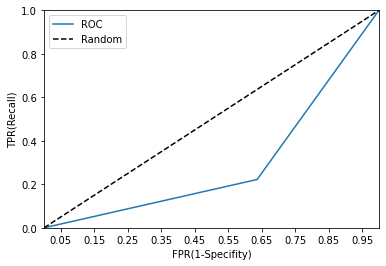

In [20]:
plt.plot(fpr,tpr, label="ROC")
plt.plot([0,1],[0,1], 'k--', label="Random")
plt.legend()

start,end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1),2))
plt.xlim(0,1); plt.ylim(0,1)

plt.xlabel('FPR(1-Specifity)')
plt.ylabel('TPR(Recall)')

### Log Loss
Log Loss를 최소화하면 분류 모델의 accuracy가 높아짐.

In [21]:
from sklearn.metrics import log_loss

log_loss = log_loss(y_true,y_pred)
log_loss

24.177423335538045

## Regression Evaluation
MAE, MSE, RMSE, R^2, MSLE, RMSLE

In [22]:
import numpy as np
import pandas as pd

np.random.seed = 123

y_true = np.random.randint(low=10, high=900, size=500)
y_pred = y_true + np.round(np.random.random(500), decimals=1) * np.random.randint(low=-10, high=10, size=500)

print(y_true.shape)
print(y_pred.shape)

y_df = pd.DataFrame(y_true, columns=['y_true'])
y_df['y_pred'] = y_pred
y_df[y_df['y_true'] > y_df['y_pred']].head(10)

(500,)
(500,)


,y_true,y_pred
6,870,868.4
7,190,189.4
8,368,366.2
12,872,864.8
13,421,419.5
14,300,294.0
16,690,682.8
18,847,846.2
19,586,584.6
21,428,423.0


### MAE(Mean Absolute Error)
(실제값 - 측정값) 절댓값의 평균

In [25]:
mae_1 = abs(y_pred - y_true).mean()
mae_1

2.7018

In [28]:
from sklearn.metrics import mean_absolute_error
mae_2 = mean_absolute_error(y_true,y_pred)

mae_2

2.7018

### MSE (Mean Squared Error)

In [29]:
mse_1 = ((y_pred - y_true)**2).mean()
mse_1

12.55222

In [31]:
from sklearn.metrics import mean_squared_error
mse_2 = mean_squared_error(y_true,y_pred)
mse_2

12.55222

### RMSE (Root Mean Squared Error)
MSE가 제곱을 하여 실제 오류 평균보다 커지는 특성이 있어 루트 씌운것

In [32]:
mse = ((y_pred - y_true)**2).mean()
rmse = np.sqrt(mse)
rmse

3.5429112323059972

### MSLE (Mean Squared Logarithmic Error)
각 예측과 실제값에 로그 취한 값의 차이 제곱의 평균

In [40]:
msle_1 = ((np.log1p(y_true) - np.log1p(y_pred))**2).mean()
msle_1

0.0019157307448924286

In [41]:
from sklearn.metrics import mean_squared_log_error
msle_2 = mean_squared_log_error(y_true,y_pred)
msle_2

0.0019157307448924286

RMSLE (Root Mean Squared Logarithm Error)

In [42]:
msle = ((np.log1p(y_true) - np.log1p(y_pred))**2).mean()
rmsle = np.sqrt(msle)
rmsle

0.04376906150344589

### $R^2$
실제 값의 분산 대비 예측 값의 분산 비율. 1에 가까울 수록 예측 정확도가 높다. 

In [45]:
ssres = sum((y_true - y_pred)**2)
sstot = sum((y_true - y_true.mean())**2)

r2_1 = 1 - (ssres/sstot)
r2_1

0.9998043528829114

In [46]:
from sklearn.metrics import r2_score
r2_2 = r2_score(y_true, y_pred)
r2_2

0.9998043528829114

### MAPE (Mean Absolute Pecentage Error)


In [51]:
mape = (abs((y_pred - y_true) / y_true)).mean() * 100
mape

1.5250170960110454